In [89]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
e = 0.9
a = 10
T = 0.5
n = 2*pi/T
vp = n*a*np.sqrt((1+e)/(1-e))
# vp=0.
print vp

547.755395951


In [117]:
pos = np.array([[0.,0.,0.],[a*(1-e),0.,0.]])

m = np.array([5e11, 1e5])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


In [118]:
print pos

[[ 0.  0.  0.]
 [ 1.  0.  0.]]


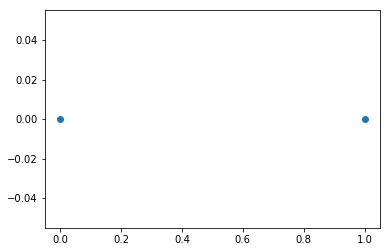

In [119]:
plt.plot(pos[:,0],pos[:,1],'o')

In [120]:
import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)

In [121]:
print acel

[[  3.07611400e-01   0.00000000e+00   0.00000000e+00]
 [ -1.53805700e+06   0.00000000e+00   0.00000000e+00]]


In [122]:
import runge
dt = 0.0001
nit = 1000
    
posf,velf,acf = runge.rungek(eps,dt,nit,m,pos,vel,acel)

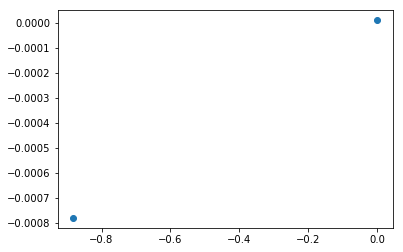

In [123]:
plt.plot(posf[:,0],posf[:,1],'o')

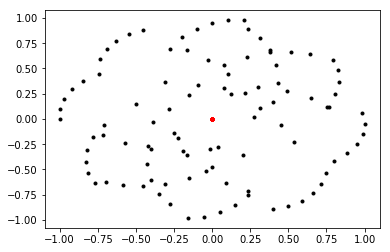

In [124]:
path = '/home/omarioni/metodos_numericos/_data/P2C/runge/'
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    plt.plot(posf[1,0],posf[1,1],'.k')
    plt.plot(posf[0,0],posf[0,1],'.r')